In [1]:
# useful packages
import numpy as np
import csv
import math
import pandas as pd
from sklearn import preprocessing
from sklearn import datasets
from sklearn import cluster
import matplotlib.pyplot as plt
import itertools

In [2]:
# load data as a dataframe with pandas
user_history = pd.read_csv("user_history.csv")
user_history_without_user_ID = user_history.drop(['USER ID'],axis=1)
user_ratings = pd.read_csv("user_ratings.csv")

In [3]:
user_history.shape

(4500, 101)

In [4]:
user_ratings.shape

(33725, 3)

To get a better sense of the data, using pandas, you can look at the top 5 rows using the head function:

In [5]:
user_history.head()

,USER ID,alpine kimono,sweden kansas,student icon,supreme ivan,albert charlie,heavy trapeze,fabric tokyo,brother robin,tiger catalog,...,cigar lagoon,equal comedy,bombay podium,helena robot,prodigy rhino,jumbo gray,radius wizard,fame quiz,bazaar complex,glass slogan
0,100950,2.192897,0.361397,0.531663,0.016105,0.694338,1.250662,1.483259,1.799682,0.664616,...,0.309236,2.622033,1.242243,2.947560,0.693319,0.625303,2.352295,1.548417,1.517709,1.508219
1,100956,2.776597,0.788821,1.187149,0.473049,2.245112,1.998881,0.072812,1.441970,2.264368,...,2.304845,1.498307,0.319484,0.089212,3.157167,2.789594,1.003377,1.141516,2.011509,0.377898
2,100962,0.281717,5.046727,4.407484,2.138591,1.075562,0.385842,0.626482,0.026648,1.949374,...,1.463952,0.601814,1.983130,2.364877,0.429133,2.758070,0.563619,0.271453,0.579626,1.785609
3,100969,0.943147,1.165713,2.016138,1.236626,0.973435,2.514205,0.022476,1.091282,1.320748,...,1.428416,3.791742,1.102070,3.250911,1.209403,0.246261,0.558631,1.163652,1.922758,1.008040
4,100974,0.485729,4.633607,4.120416,1.497073,1.463875,0.867737,0.877514,0.019603,1.751483,...,1.179954,1.031741,1.935182,2.012611,0.553173,2.614605,0.313479,0.143246,0.914407,2.011048


In [6]:
user_ratings.head()

,USER ID,PRODUCT,RATING
0,100950,secret postage,4
1,100950,violet saga,4
2,100950,pepper chicago,3
3,100950,nina sailor,2
4,100950,front salami,3


In [7]:
user_ratings_table = pd.pivot_table(user_ratings,values='RATING', index='USER ID',
                    columns='PRODUCT')
user_ratings_table.head()

PRODUCT,adrian crater,anagram mentor,apropos pizza,bandit anatomy,banjo ladder,barcode arnold,bazooka diagram,bronze mystic,calypso zigzag,casino unit,...,tourist micro,tripod stand,update lola,ventura puzzle,viking llama,violet saga,vista queen,viva avalon,voodoo planet,wheel gibson
USER ID,,,,,,,,,,,,,,,,,,,,,
100950,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
100956,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100969,NaN,10.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,0.0,NaN,NaN,8.0,2.0
100974,NaN,NaN,NaN,9.0,NaN,5.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN


In [8]:
len(user_ratings.PRODUCT.unique())

75

In [9]:
np.sum(~np.isnan(user_ratings_table.to_numpy()))

33725

In [10]:
# encode users as indices
le_user = preprocessing.LabelEncoder()
le_user.fit(user_history['USER ID'])

user_with_rating_index = le_user.transform(user_ratings['USER ID'])
all_user_index = le_user.transform(user_history['USER ID'])
user_ratings['USER INDEX'] = user_with_rating_index
user_ratings.head()

# encode products as indices
le_product = preprocessing.LabelEncoder()
le_product.fit(user_ratings['PRODUCT'])

product_ID = le_product.transform(user_ratings['PRODUCT'])
user_ratings['PRODUCT ID'] = product_ID
user_ratings.head()

,USER ID,PRODUCT,RATING,USER INDEX,PRODUCT ID
0,100950,secret postage,4,0,54
1,100950,violet saga,4,0,70
2,100950,pepper chicago,3,0,41
3,100950,nina sailor,2,0,35
4,100950,front salami,3,0,18


We can take the data in user_history and turn it into a matrix using the following command:

In [11]:
X = user_history.to_numpy()
X.shape


(4500, 101)

In [12]:
all_data=pd.merge(user_history,user_ratings_table,right_index=True,left_on='USER ID',how='outer' )
all_data.head()

,USER ID,alpine kimono,sweden kansas,student icon,supreme ivan,albert charlie,heavy trapeze,fabric tokyo,brother robin,tiger catalog,...,tourist micro,tripod stand,update lola,ventura puzzle,viking llama,violet saga,vista queen,viva avalon,voodoo planet,wheel gibson
0,100950,2.192897,0.361397,0.531663,0.016105,0.694338,1.250662,1.483259,1.799682,0.664616,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
1,100956,2.776597,0.788821,1.187149,0.473049,2.245112,1.998881,0.072812,1.441970,2.264368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100962,0.281717,5.046727,4.407484,2.138591,1.075562,0.385842,0.626482,0.026648,1.949374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100969,0.943147,1.165713,2.016138,1.236626,0.973435,2.514205,0.022476,1.091282,1.320748,...,NaN,NaN,5.0,NaN,NaN,0.0,NaN,NaN,8.0,2.0
4,100974,0.485729,4.633607,4.120416,1.497073,1.463875,0.867737,0.877514,0.019603,1.751483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN


In [13]:
features=all_data.iloc[:,1:101].values
targets=all_data.iloc[:,101:176].values

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_train,X_test,y_train,y_test=train_test_split(features,targets,test_size=0.2,random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.34345027 0.25449456]


In [39]:
from sklearn.linear_model import LogisticRegression 
print(y_train)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train[0]) #where I hit the block

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan  5.]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan  1.]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

You can ignore everything else, I have no idea what the following means... I was playing around

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(user_history,test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_train,X_test,y_train,y_test=train_test_split(user_history, user_ratings_table,test_size=0.2,random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_



ValueError: Found input variables with inconsistent numbers of samples: [4500, 3000]

In [32]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.34005661 0.25197488]


For an introduction and short tutorial on pandas, you are invited to read over https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html.

In [33]:
print(X_train)

[[ 9.02089261 -1.29968136]
 [-2.3416831   6.3614043 ]
 [-3.45018264  7.39465924]
 ...
 [ 7.07118946 -1.07664042]
 [ 7.99250564 -1.24512451]
 [ 8.15645331 -1.51488309]]


In [34]:
print(X_test)

[[-3.30640622  7.01875265]
 [-3.56231345  7.21815979]
 [-3.48165451  7.25532124]
 ...
 [ 9.14389012 -1.62143877]
 [ 7.74833882 -0.88422612]
 [-5.3458418  -5.37651785]]


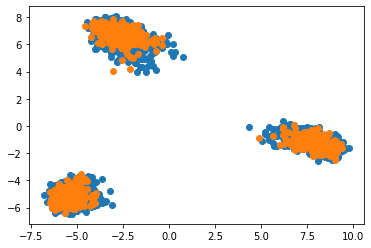

In [35]:
train_x,train_y=X_train.T
test_x,test_y=X_test.T
plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)

In [36]:
pca2 = PCA(n_components = 2)
 
X2= pca.fit_transform(X)
 

In [37]:
X2

array([[ 1.23815969e+04, -5.50102802e-01],
       [ 1.23755970e+04,  6.98039290e+00],
       [ 1.23695967e+04, -7.88625938e+00],
       ...,
       [-1.22974031e+04, -7.29064099e-02],
       [-1.23044032e+04, -7.06418347e+00],
       [-1.23134032e+04, -6.46652762e+00]])

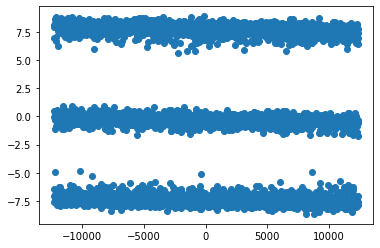

In [38]:
x,y=X2.T
plt.scatter(x,y)